In [56]:
import pandas as pd
from patsy import dmatrix
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
plt.rc("font", family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# 가상데이터셋 만들어보기
# X, y, w = make_regression(n_samples, n_features, bias, noise, random_state, coef=True)

In [5]:
from sklearn.datasets import make_regression

In [45]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0)

In [54]:
w

array(15.89695836)

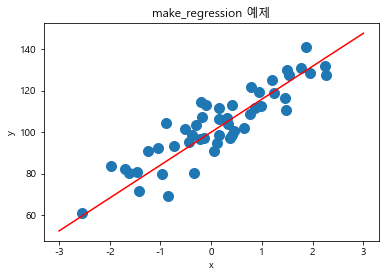

In [26]:
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, 'r-')
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

In [120]:
def make_regression2(n_samples, bias, noise, random_state):
    np.random.seed(random_state)
    X = np.random.normal(loc=4, scale=7, size=n_samples)
    w = 100 * np.random.normal(size=1)[0]
    y0 = w * X + bias
    epsilon = np.random.normal(scale=noise, size=n_samples)
    y = y0 + epsilon
    
    return X, y, w

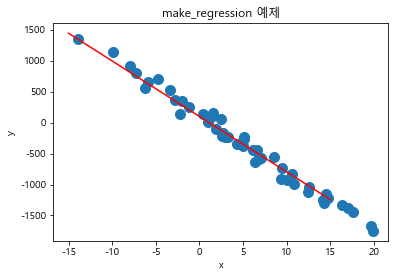

In [125]:
X2, y2, w2 = make_regression2(n_samples=50, bias=100, noise=100, random_state=0)

xx = np.linspace(-15, 15, 100)
y0 = w2 * xx + 100
plt.plot(xx, y0, 'r-')
plt.scatter(X2, y2, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

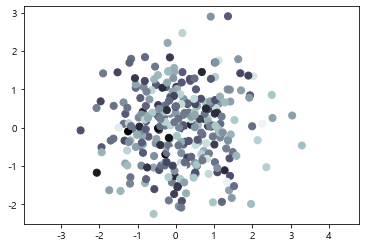

In [141]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=0, noise=10, coef=True)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=mpl.cm.bone)
plt.axis('equal')
plt.show()

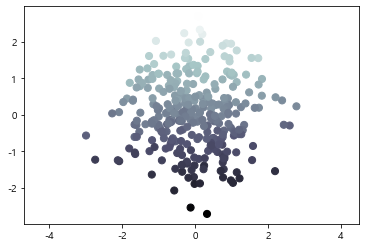

In [138]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, noise=10, coef=True)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=mpl.cm.bone)
plt.axis('equal')
plt.show()

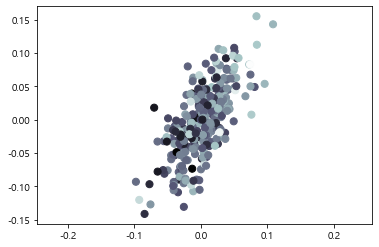

In [142]:
# 다중공선성 > 회귀분석에 악영향  (랭크수)
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=10, coef=True, tail_strength=0)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=mpl.cm.bone)
plt.axis('equal')
plt.show()

In [145]:
X0 = np.arange(10).reshape(5,2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [146]:
import statsmodels.api as sm

In [147]:
X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

In [158]:
# 회귀분석실습
X0, y, w = make_regression(n_samples=200, n_features=1, bias=100, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

w1 = np.linalg.inv(X.T @ X) @ X.T @ y
w1, w

(array([[99.79150869],
        [86.96171201]]),
 array(86.44794301))

In [159]:
X0, y, w = make_regression(n_samples=200, n_features=1, bias=100, noise=0, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

w1 = np.linalg.inv(X.T @ X) @ X.T @ y
w1, w

(array([[100.        ],
        [ 86.44794301]]),
 array(86.44794301))